# Building and Visualizing word frequencies


In this lab, we will focus on the `build_freqs()` helper function and visualizing a dataset fed into it. In our goal of tweet sentiment analysis, this function will build a dictionary where we can lookup how many times a word appears in the lists of positive or negative tweets. This will be very helpful when extracting the features of the dataset in the week's programming assignment. Let's see how this function is implemented under the hood in this notebook.

## Setup

Let's import the required libraries for this lab: 

In [1]:
import nltk # Python library for NLP
from nltk.corpus import twitter_samples # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt
import numpy as np

In [2]:
nltk.data.path.append('C:/Users/pulki/OneDrive/Documents/Jupyter/NLP - Deeplearning.ai/nltk_data')

#### Import some helper functions that we provided in the utils.py file:
* `process_tweet()`: Cleans the text, tokenizes it into separate words, removes stopwords, and converts words to stems.
* `build_freqs()`: This counts how often a word in the 'corpus' (the entire set of tweets) was associated with a positive label `1` or a negative label `0`. It then builds the `freqs` dictionary, where each key is a `(word,label)` tuple, and the value is the count of its frequency within the corpus of tweets.

In [3]:
# download the stopwords for the process_tweet function
from nltk.corpus import stopwords

# import our convenience functions
# from nlp_utils import process_tweet, build_freqs

## Load the NLTK sample dataset

As in the previous lab, we will be using the [Twitter dataset from NLTK](http://www.nltk.org/howto/twitter.html#Using-a-Tweet-Corpus).

In [4]:
# select the lists of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

# concatenate the lists, 1st part is the positive tweets followed by the negative
tweets = all_positive_tweets + all_negative_tweets

# let's see how many tweets we have
print('Size of tweets list = ', len(tweets))

Size of tweets list =  10000


Next, we will build a labels array that matches the sentiments of our tweets.  This data type works pretty much like a regular list but is optimized for computations and manipulation. The `labels` array will be composed of 10000 elements. The first 5000 will be filled with `1` labels denoting positive sentiments, and the next 5000 will be `0` labels denoting the opposite. We can do this easily with a series of operations provided by the `numpy` library:

* `np.ones()` - create an array of 1's
* `np.zeros()` - create an array of 0's
* `np.append()` - concatenate arrays

In [5]:
# make a numpy array representing labels of the tweets
labels = np.append(np.ones(len(all_positive_tweets)), np.zeros(len(all_negative_tweets)))

In [6]:
import re
import string
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer

stopwords_english = stopwords.words('english')
punctuation = string.punctuation

def preprocess_tweet(tweet):
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'https?./\/\.*[\r\n]*', '', tweet)
    tweet = re.sub(r'#*', '', tweet)
    
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(tweet.lower())
    
    clean_tokens = [x for x in tokens if (x not in stopwords_english) & (x not in punctuation)]
    
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in clean_tokens]

In [7]:
print(tweets[1], "\n", preprocess_tweet(tweets[1]))

@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks! 
 ['@lamb2ja', 'hey', 'jame', 'odd', ':/', 'pleas', 'call', 'contact', 'centr', '02392441234', 'abl', 'assist', ':)', 'mani', 'thank']


## Word frequency dictionary

In [8]:
import pandas as pd

def build_freq(tweet_list, labels):
    wl_pair = []
    for tweet, label in zip(tweet_list, labels):
        for word in tweet:
            wl_pair.append([word, label])
    
    freq = pd.DataFrame(wl_pair, columns=['vocab', 'label'])
    
    word_freq = pd.DataFrame(freq.groupby('vocab').sum())
    
    freq.label = 1-freq.label
    word_freq['neg'] = freq.groupby('vocab').sum()
    
    return word_freq.convert_dtypes().rename(columns={'label': 'pos'}).reset_index()#.to_dict(orient='list')

In [9]:
sample_tweet_tokenized = [preprocess_tweet(tweet) for tweet in (tweets[:5] + tweets[-5:])]
print(sample_tweet_tokenized)

[['followfriday', '@france_int', '@pkuchly57', '@milipol_pari', 'top', 'engag', 'member', 'commun', 'week', ':)'], ['@lamb2ja', 'hey', 'jame', 'odd', ':/', 'pleas', 'call', 'contact', 'centr', '02392441234', 'abl', 'assist', ':)', 'mani', 'thank'], ['@despiteoffici', 'listen', 'last', 'night', ':)', 'bleed', 'amaz', 'track', 'scotland'], ['@97side', 'congrat', ':)'], ['yeaaaah', 'yippppi', 'accnt', 'verifi', 'rqst', 'succeed', 'got', 'blue', 'tick', 'mark', 'fb', 'profil', ':)', '15', 'day'], ['wanna', 'chang', 'avi', 'usanel', ':('], ['puppi', 'broke', 'foot', ':('], ["where'", 'jaebum', 'babi', 'pictur', ':('], ['mr', 'ahmad', 'maslan', 'cook', ':(', 't.co/arcid31zv6'], ['@eawoman', 'hull', 'support', 'expect', 'misser', 'week', ':-(']]


In [10]:
print(build_freq(sample_tweet_tokenized, np.append(labels[:5], labels[-5:])))

          vocab  pos  neg
0   02392441234    1    0
1            15    1    0
2            :(    0    4
3            :)    5    0
4           :-(    0    1
..          ...  ...  ...
66        wanna    0    1
67         week    1    1
68       where'    0    1
69      yeaaaah    1    0
70      yippppi    1    0

[71 rows x 3 columns]


In [11]:
df = build_freq([preprocess_tweet(tweet) for tweet in tweets], labels)
df.head()

,vocab,pos,neg
0,(-:,2,0
1,(:,1,7
2,):,7,6
3,);,1,0
4,--->,1,0


In [12]:
df.shape

(19323, 3)

As shown above, each key is a 2-element tuple containing a `(word, y)` pair. The `word` is an element in a processed tweet while `y` is an integer representing the corpus: `1` for the positive tweets and `0` for the negative tweets. The value associated with this key is the number of times that word appears in the specified corpus. For example: 

``` 
# "folowfriday" appears 25 times in the positive tweets
('followfriday', 1.0): 25

# "shame" appears 19 times in the negative tweets
'shame', 0.0): 19 
```

Now, it is time to use the dictionary returned by the `build_freqs()` function. First, let us feed our `tweets` and `labels` lists then print a basic report:

## Table of word counts

We will select a set of words that we would like to visualize. It is better to store this temporary information in a table that is very easy to use later.

In [13]:
# select some words to appear in the report. we will assume that each word is unique (i.e. no duplicates)
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']

report_df = df[df.vocab.isin(keys)].reset_index(drop=True)
report_df

,vocab,pos,neg
0,:(,1,4585
1,:),3691,2
2,bad,18,73
3,best,65,22
4,good,238,101
5,happi,212,25
6,idea,27,10
7,mad,4,11
8,magnific,2,0
9,merri,1,0


Now print the frequency of each word depending on its class.

Unfortunately, this does not help much to understand the data. It would be better to visualize this output to gain better insights.

We can then use a scatter plot to inspect this table visually. Instead of plotting the raw counts, we will plot it in the logarithmic scale to take into account the wide discrepancies between the raw counts (e.g. `:)` has 3568 counts in the positive while only 2 in the negative). The red line marks the boundary between positive and negative areas. Words close to the red line can be classified as neutral. 

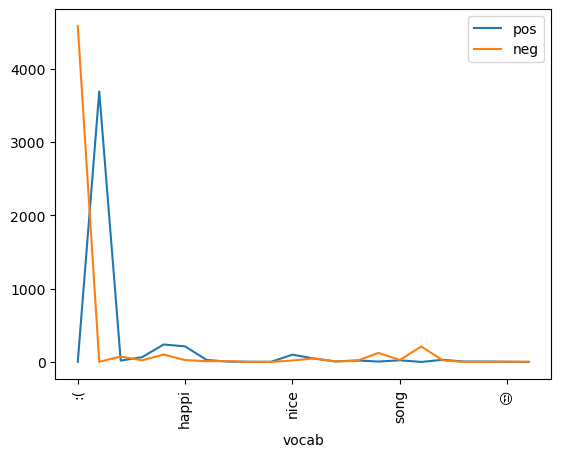

In [14]:
report_df.plot(x='vocab', rot=90);

C:\Users\pulki\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
C:\Users\pulki\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
C:\Users\pulki\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128556 (\N{GRIMACING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


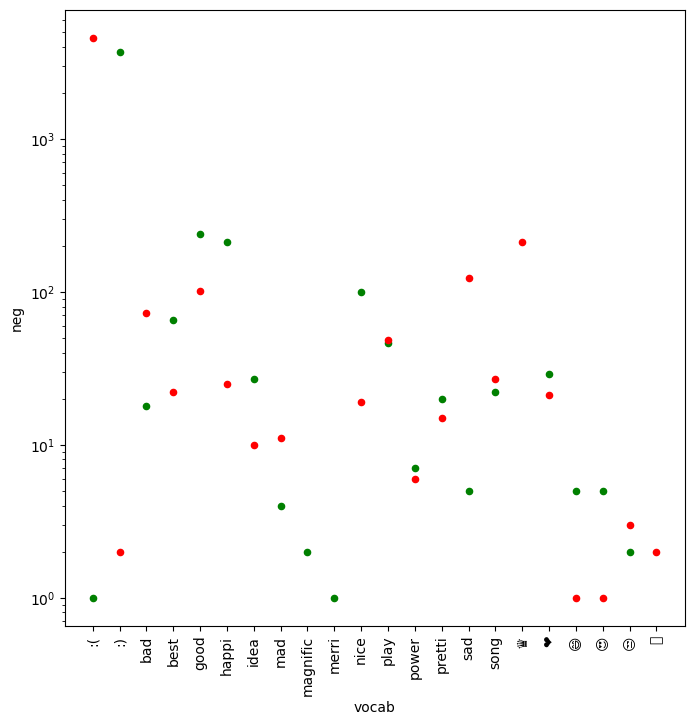

In [15]:
fig, ax = plt.subplots(figsize = (8, 8))

report_df.plot(x='vocab', y='pos', logy=True, rot=90, kind='scatter', ax=ax, color='Green')
report_df.plot(x='vocab', y='neg', logy=True, rot=90, kind='scatter', ax=ax, color='Red')

plt.show()

C:\Users\pulki\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:484: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs2, **kwargs)


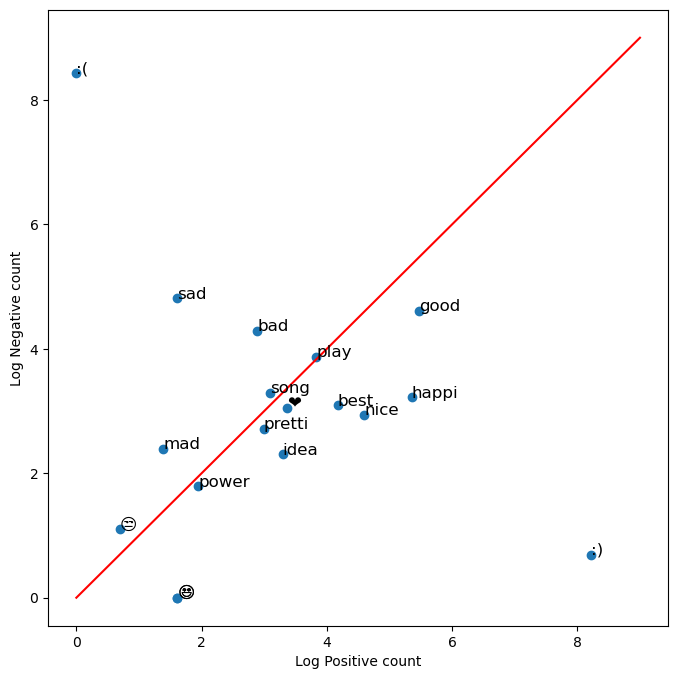

In [16]:
fig, ax = plt.subplots(figsize = (8, 8))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log(report_df.pos)  

# do the same for the negative counts
y = np.log(report_df.neg) 

# Plot a dot for each pair of words
ax.scatter(x, y)

# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i in range(len(y)):
    ax.annotate(report_df.vocab[i], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red') # Plot the red line that divides the 2 areas.
plt.show()

This chart is straightforward to interpret. It shows that emoticons `:)` and `:(` are very important for sentiment analysis. Thus, we should not let preprocessing steps get rid of these symbols!

Furthermore, what is the meaning of the crown symbol? It seems to be very negative!

In [17]:
df.head()

,vocab,pos,neg
0,(-:,2,0
1,(:,1,7
2,):,7,6
3,);,1,0
4,--->,1,0


### That's all for this lab! We've seen how to build a word frequency dictionary and this will come in handy when extracting the features of a list of tweets. Next up, we will be reviewing Logistic Regression. Keep it up!